In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import math
from skimpy import skim

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib as mlp

sns.set_theme(style='darkgrid', palette='mako')

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 15

In [4]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

In [5]:
RANDOM = 42

# LOADING DATA

In [6]:
cargotype_info = pd.read_csv('data/cargotype_info.csv', index_col='Unnamed: 0')
carton_price = pd.read_excel('data/carton_price.xlsx')
carton = pd.read_csv('data/carton.csv')
data = pd.read_csv('data/data.csv', index_col='Unnamed: 0')
sku_cargotypes = pd.read_csv('data/sku_cargotypes.csv', index_col='Unnamed: 0')
sku = pd.read_csv('data/sku.csv', index_col='Unnamed: 0')

In [7]:
def view_func(data):
    display(data)
    skim(data)
    print('DUPLICATES')
    print(data.duplicated().sum())

## CARGOTYPE_INFO

In [8]:
view_func(cargotype_info)

,cargotype,description
0,770.0,консервы
1,301.0,тяжеловесный и крупногабаритный 20кг
2,980.0,Требует обязательной маркировки
3,985.0,"Не требует наличия маркировки, но требует выво..."
4,990.0,Потребует обязательной маркировки в ближайшем ...
5,910.0,интим товар
6,900.0,медикаменты
7,10.0,документы и ценные бумаги
8,50.0,предметы искусства
9,100.0,товары народного потребления


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 98     │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ cargotype           │     2 │        2 │      550 │    310 │     0 │    300 │    770 │    1300 │  ▆███▆▁   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ description               │       0 │          0 │                          2.4 │                      240 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
1


In [9]:
cargotype_info = cargotype_info.dropna().reset_index(drop=True)

## CARTON_PRICE

In [10]:
view_func(carton_price)

,Unnamed: 0,01.03.2023
0,MYA,1.109861
1,MYB,2.297432
2,MYC,3.616713
3,MYD,6.918375
4,MYE,8.062722
5,MYF,4.083130
6,YMA,4.392937
7,YMC,7.777487
8,YME,23.670260
9,YMF,10.661487


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15     │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd    ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ 01.03.2023          │     0 │        0 │       14 │    13 │    1.1 │    4.2 │     21 │      41 │  █▅▁▁▁▃   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴───────┴────────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Unnamed: 0                │       0 │          0 │                            1 │                       15 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


In [11]:
carton_price.columns = ['cartontype', 'price']

## CARTON

In [12]:
view_func(carton)

,CARTONTYPE,LENGTH,WIDTH,HEIGHT,DISPLAYRFPACK
0,YMA,24.7,15.0,10.00,1
1,YMC,30.0,20.0,15.00,1
2,YME,30.0,30.0,44.50,1
3,YMF,35.0,25.0,15.00,1
4,YMG,44.7,30.0,20.00,1
5,YMH,42.0,20.0,86.00,0
6,YMJ,50.0,29.0,48.00,0
7,KSD,0.0,0.0,0.00,0
8,YML,60.0,40.0,45.00,1
9,YMN,60.0,60.0,40.00,0


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 29     │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA    ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ LENGTH                │     0 │       0 │      40 │      23 │    0 │     27 │     52 │      90 │  ▂▃█▁▃▁   │  │
│ │ WIDTH                 │     0 │       0 │      30 │      18 │    0 │     20 │     40 │      63 │  ▃██▃▂▅   │  │
│ │ HEIGHT                │     0 │       0 │      27 │      26 │    0 │      5 │     45 │      86 │  █▄▁▃▂▁   │  │
│ │ DISPLAYRFPACK         │     0 │       0 │    0.62 │    0.49 │    0 │      0 │      1 │       1 │  ▅    █   │  │
│ └───────────────────────┴───────┴─────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CARTONTYPE                │       0 │          0 │                            1 │                       29 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


In [13]:
carton.columns = [s.lower() for s in carton.columns]

## DATA

In [14]:
view_func(data)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid
0,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
1,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
2,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
3,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
4,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325618,7,0e4f34db53e37d6bf171c2e055e2b4e0,MYC,1,YMC,MYC,4560,YMC,2080,8525,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,be7c9ad8b9430d358e6c276b94e2beff,f94f078101752133502202383bc87743
325619,7,0e4f34db53e37d6bf171c2e055e2b4e0,MYC,1,YMC,MYC,4560,YMC,2080,8525,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,be7c9ad8b9430d358e6c276b94e2beff,f94f078101752133502202383bc87743
325620,7,e71d2e750ce9a7a39c273c634be1665d,YMC,1,YMC,YMC,8525,YMC,3523,8525,0.284,9db21acf9e6c1a66493c246c1461f989,be7c9ad8b9430d358e6c276b94e2beff,58054d533ef06746ffd8cf99fad4a8cb
325621,7,2e2a642f611b5a6f2c404ab945fbc2a3,MYB,1,YMU,MYB,2816,YMU,552,2592,0.230,4aedb72c5662562524f6119918c7179b,be7c9ad8b9430d358e6c276b94e2beff,1666b5c878be124f05fb9a1d95dd8a68


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 325623 │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 14     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0   ┃ p25    ┃ p75     ┃ p100       ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━┩  │
│ │ whs                 │    0 │      0 │      1.4 │      2.1 │    0 │      0 │       3 │          7 │ █▁▁▁ ▁  │  │
│ │ box_num             │    0 │      0 │      2.8 │       16 │    1 │      1 │       1 │        240 │    █    │  │
│ │ sel_calc_cube       │    0 │      0 │    11000 │    14000 │    0 │   3400 │   16000 │     110000 │   █▂    │  │
│ │ pack_volume         │    0 │      0 │     5400 │    29000 │    0 │    500 │    3200 │    1800000 │    █    │  │
│ │ rec_calc_cube       │    0 │      0 │    18000 │    27000 │    0 │   3400 │   18000 │     110000 │ █▂▁  ▁  │  │
│ │ goods_wght          │    0 │      0 │      1.1 │      4.1 │    0 │   0.11 │     0.8 │        150 │    █    │  │
│ └─────────────────────┴──────┴────────┴──────────┴──────────┴──────┴────────┴─────────┴────────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ orderkey                              │     0 │         0 │                        1 │              330000 │  │
│ │ selected_cartontype                   │     0 │         0 │                        1 │              330000 │  │
│ │ recommended_cartonty                  │     0 │         0 │                        1 │              330000 │  │
│ │ selected_carton                       │     0 │         0 │                        1 │              330000 │  │
│ │ recommended_carton                    │     0 │         0 │                        1 │              330000 │  │
│ │ sku                                   │     0 │         0 │                        1 │              330000 │  │
│ │ who                                   │     0 │         0 │                        1 │              330000 │  │
│ │ trackingid                            │     0 │         0 │                        1 │              330000 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
91795


In [167]:
data.duplicated().sum()

91795

## SKU_CARGOTYPES

In [15]:
view_func(sku_cargotypes)

,sku,cargotype
0,4862bf0e760a593b13f3f2fcf822e533,290
1,4862bf0e760a593b13f3f2fcf822e533,901
2,50d3c4fc66ad423b7feaadff2d682ee0,290
3,50d3c4fc66ad423b7feaadff2d682ee0,901
4,24ce9dba9f301ada55f60e25ee1498d2,290
...,...,...
21053147,5786e5c2309967c64b10e443ce1a807c,691
21053148,859788a147004b9a1d24a8168460f79a,200
21053149,859788a147004b9a1d24a8168460f79a,290
21053150,859788a147004b9a1d24a8168460f79a,310


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 21053152 │ │ string      │ 1     │                                                        │
│ │ Number of columns │ 2        │ │ int64       │ 1     │                                                        │
│ └───────────────────┴──────────┘ └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ cargotype           │     0 │        0 │      530 │    260 │     0 │    290 │    690 │    1300 │   ▁█▅▃▄   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sku                       │       0 │          0 │                            1 │                 21000000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


## SKU

In [16]:
view_func(sku)

,sku,a,b,c
0,8ba57dcdba9a58b0c4edd180bef6afc9,11.0,31.0,28.0
1,d9af6ce6f9e303f4b1a8cb47cde21975,29.0,14.0,40.0
2,8b91fd242bde88f0891380506d9c3caa,12.0,13.0,35.0
3,e8af308a7659e34194770d1e3a48e144,3.0,13.0,8.0
4,dc0e2542e122731217289b8e6d3bd3f8,96.0,18.0,56.0
...,...,...,...,...
6385956,5367045e88650a12cde4803f55ed7525,0.0,0.0,0.0
6385957,8a3dcb8f1ccce02a3df63a9db0903f38,0.0,0.0,0.0
6385958,31e5069a999cd927bd623fd699957630,0.0,0.0,0.0
6385959,888059750dcd75922faf3b60144e4def,0.0,0.0,0.0


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 6385961 │ │ float64     │ 3     │                                                         │
│ │ Number of columns │ 4       │ │ string      │ 1     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA    ┃ NA %     ┃ mean     ┃ sd    ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ a                    │     0 │        0 │       21 │    19 │     0 │     10 │     28 │    6600 │     █     │  │
│ │ b                    │     0 │        0 │       12 │    15 │     0 │      3 │     16 │    2000 │     █     │  │
│ │ c                    │     0 │        0 │       18 │    15 │     0 │      8 │     24 │     590 │     █     │  │
│ └──────────────────────┴───────┴──────────┴──────────┴───────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sku                       │       0 │          0 │                            1 │                  6400000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


# EDA

### Сделаем группу с SKU и марками типов товара

In [17]:
sku_groups = sku_cargotypes.groupby('sku')['cargotype'].apply(list).reset_index()

In [18]:
sku_groups.head()

,sku,cargotype
0,0000060b72e5a5d67ee3c37ceab6b72a,"[290, 671, 950]"
1,00000c9eb5ba2364380ab2e3bf870c23,"[290, 440, 441, 460, 480, 690]"
2,000010b2dda4921d4982818e241847bf,"[290, 440, 441, 480, 490, 690]"
3,00001196fe633174323cb69c4ad05ecb,[290]
4,000015d94c63b8dbac214ad23bb8bb20,"[200, 290, 310]"


### Создание датасета для обучения

Добавим объем упаковки и объем товара

In [19]:
carton['vol'] = carton[['length', 'width', 'height']].prod(axis=1)
carton['dim_sum'] = carton[['length', 'width', 'height']].sum(axis=1)

sku['vol'] = np.floor(sku[['a', 'b', 'c']].prod(axis=1))
sku['dim_sum'] = sku[['a', 'b', 'c']].sum(axis=1)

In [20]:
df = data.copy()

Дропнем колонки

In [21]:
cols_to_drop = ['who', # Лишняя информация
                'trackingid', # Лишняя информация для обучения
                'recommended_cartontype', # Работа прошлого алгоритма - для обучения лишняя инфа
                'recommended_carton', # Дубликат
                'selected_cartontype', # Дубликат 
                'rec_calc_cube', # Результат предсказания
                #'orderkey', 
                'whs', # Не влияет на задачу
                'sel_calc_cube'
                ]

In [22]:
df = df.drop(cols_to_drop, axis=1)

df.head()

,orderkey,box_num,selected_carton,pack_volume,goods_wght,sku
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
1,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
2,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
3,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
4,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd


In [23]:
df.duplicated().sum()

91798

In [24]:
df = df.drop_duplicates().reset_index(drop=True)

df.shape

(233825, 6)

Добавим ОБЪЕМ И СУММУ РАЗМЕРОВ ТОВАРА

In [25]:
sku = sku[sku['vol']>0]

In [26]:
df = pd.merge(df, sku, on='sku', how='left')

df = df.rename(columns={'vol':'sku_vol', 
                        'a':'sku_a', 
                        'b': 'sku_b',
                        'c': 'sku_c'})

df.head()

,orderkey,box_num,selected_carton,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,STRETCH,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6
2,3e646181f6f708edd3326c1626c12d23,1,STRETCH,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0
3,7047c16a6b7c120162ca3da0ebca43fd,1,STRETCH,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5
4,097917e584151c0c21f205b2c3aafa10,1,STRETCH,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3


Максимальный размер и диагональ товара в заказе

In [27]:
df_grouped = df.groupby('orderkey')[['sku_a', 'sku_b', 'sku_c']].max().reset_index()

df_grouped['sku_max_size'] = df_grouped[['sku_a', 'sku_b', 'sku_c']].max(axis=1)

# df_grouped['sku_max_diag'] = round(np.sqrt(df['sku_a']**2 + df['sku_b']**2 + df['sku_c']**2), 1)

df_weight = df.groupby('orderkey')['goods_wght'].sum().reset_index()

df_grouped = pd.merge(df_grouped, df_weight, on='orderkey')

df_grouped.columns = ['orderkey', 'sku_a', 'sku_b', 'sku_c', 'sku_max_size', 'sum_wght']

df_grouped

,orderkey,sku_a,sku_b,sku_c,sku_max_size,sum_wght
0,00004fc4755eeb7e851e52ec91130fe4,17.0,38.0,6.0,38.0,1.000
1,00008e765c2d85abfa9c97563afd98ef,19.0,3.0,5.0,19.0,0.135
2,0000c268eb1be1dd5b8c1a032f7318fc,25.0,7.0,17.0,25.0,0.090
3,0000fc4c7acac6e89f82392b90e47a27,8.0,6.0,22.0,22.0,0.400
4,0001963724fa4cc12d4f025056085633,15.0,17.0,10.0,17.0,0.456
...,...,...,...,...,...,...
159894,fffe13683b35336a4c1bb061f479f05b,9.0,1.5,9.0,9.0,0.016
159895,ffff1e5d7f5b52f28d733ba01a4589b9,25.0,3.0,14.0,25.0,0.150
159896,ffff1f0a51126b373f36d7733a5ddb0f,14.8,4.1,21.9,21.9,0.204
159897,ffff748210310fffe23e3ade55d26401,5.0,6.0,4.0,6.0,0.030


Добавляем в датасет

In [28]:
df = pd.merge(df, df_grouped[['orderkey', 'sku_max_size', 'sum_wght']], on='orderkey', how='left')

Посчитаем кол-во товаров в заказе

In [29]:
items = df.groupby('orderkey')['sku'].count().reset_index()

items.columns = ['orderkey', 'items']

items

,orderkey,items
0,00004fc4755eeb7e851e52ec91130fe4,1
1,00008e765c2d85abfa9c97563afd98ef,1
2,0000c268eb1be1dd5b8c1a032f7318fc,1
3,0000fc4c7acac6e89f82392b90e47a27,2
4,0001963724fa4cc12d4f025056085633,2
...,...,...
159894,fffe13683b35336a4c1bb061f479f05b,1
159895,ffff1e5d7f5b52f28d733ba01a4589b9,1
159896,ffff1f0a51126b373f36d7733a5ddb0f,1
159897,ffff748210310fffe23e3ade55d26401,1


Добавим КОЛ-ВО ТОВАРОВ В ЗАКАЗЕ

In [30]:
df = pd.merge(df, items, on='orderkey', how='left')

df

,orderkey,box_num,selected_carton,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sum_wght,items
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,31.0,0.300,3
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,STRETCH,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,49.7,0.896,1
2,3e646181f6f708edd3326c1626c12d23,1,STRETCH,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,30.0,4.400,1
3,7047c16a6b7c120162ca3da0ebca43fd,1,STRETCH,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,43.8,0.700,1
4,097917e584151c0c21f205b2c3aafa10,1,STRETCH,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,33.9,2.078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233820,8ed0af8473526c54b4b2f99f0060c3ea,1,NONPACK,25168,1.260,036724225d7ff6f662afcbf909423c30,44.0,13.0,44.0,25168.0,101.0,44.0,1.260,1
233821,0e4f34db53e37d6bf171c2e055e2b4e0,1,MYC,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,26.0,20.0,4.0,2080.0,50.0,26.0,0.100,1
233822,e71d2e750ce9a7a39c273c634be1665d,1,YMC,3523,0.284,9db21acf9e6c1a66493c246c1461f989,11.4,10.2,30.3,3523.0,51.9,30.3,0.284,1
233823,2e2a642f611b5a6f2c404ab945fbc2a3,1,MYB,552,0.230,4aedb72c5662562524f6119918c7179b,23.0,2.0,12.0,552.0,37.0,23.0,0.230,1


In [31]:
df = df.dropna().reset_index(drop=True)

In [32]:
df = df[df['selected_carton']!='YMB']

In [33]:
df

,orderkey,box_num,selected_carton,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sum_wght,items
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,31.0,0.300,3
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,STRETCH,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,49.7,0.896,1
2,3e646181f6f708edd3326c1626c12d23,1,STRETCH,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,30.0,4.400,1
3,7047c16a6b7c120162ca3da0ebca43fd,1,STRETCH,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,43.8,0.700,1
4,097917e584151c0c21f205b2c3aafa10,1,STRETCH,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,33.9,2.078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224248,8ed0af8473526c54b4b2f99f0060c3ea,1,NONPACK,25168,1.260,036724225d7ff6f662afcbf909423c30,44.0,13.0,44.0,25168.0,101.0,44.0,1.260,1
224249,0e4f34db53e37d6bf171c2e055e2b4e0,1,MYC,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,26.0,20.0,4.0,2080.0,50.0,26.0,0.100,1
224250,e71d2e750ce9a7a39c273c634be1665d,1,YMC,3523,0.284,9db21acf9e6c1a66493c246c1461f989,11.4,10.2,30.3,3523.0,51.9,30.3,0.284,1
224251,2e2a642f611b5a6f2c404ab945fbc2a3,1,MYB,552,0.230,4aedb72c5662562524f6119918c7179b,23.0,2.0,12.0,552.0,37.0,23.0,0.230,1


In [34]:
df = df.drop('orderkey', axis=1)

In [35]:
df = df.drop_duplicates().reset_index(drop=True)

df

,box_num,selected_carton,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sum_wght,items
0,1,NONPACK,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,31.0,0.300,3
1,1,STRETCH,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,49.7,0.896,1
2,1,STRETCH,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,30.0,4.400,1
3,1,STRETCH,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,43.8,0.700,1
4,1,STRETCH,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,33.9,2.078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179162,6,NONPACK,1832,0.878,74ec431f87644bfed9baca351fffcdee,231.0,1.0,8.0,1848.0,240.0,231.0,62.868,6
179163,2,NONPACK,28348,1.598,ca652ac8bf220d6ea04635208136b520,38.5,11.8,62.4,28348.0,112.7,62.4,3.196,2
179164,2,NONPACK,2380,0.760,d0cdcfb1609293be2b891ec3e5d56d6a,70.0,1.0,34.0,2380.0,105.0,70.0,1.520,2
179165,4,NONPACK,1617,0.430,29dbb42befa2f176eb50828deba50afc,77.0,3.0,6.0,1386.0,86.0,77.0,2.150,5


# ГРАФИКИ

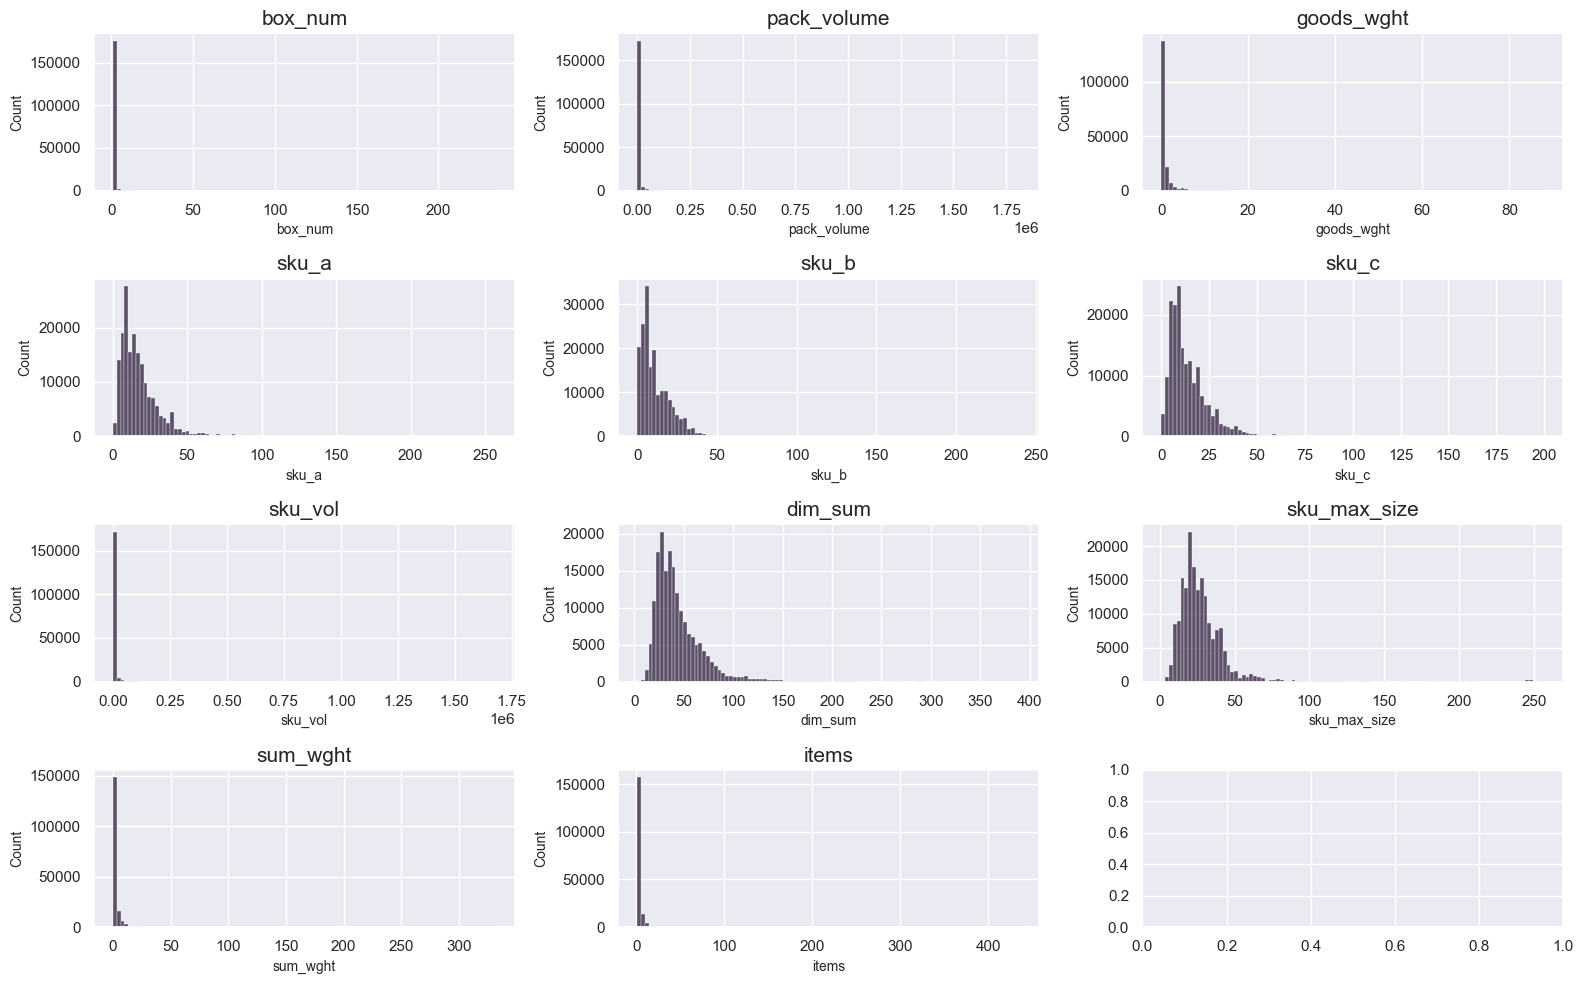

In [36]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

fig, axs = plt.subplots(4, 3, figsize=(16, 10))

axs = axs.ravel()

for i in range(11):
    sns.histplot(df_numeric[df_numeric.columns[i]], bins=100, ax=axs[i])
    axs[i].set_title(df_numeric.columns[i])

plt.tight_layout()
plt.show()

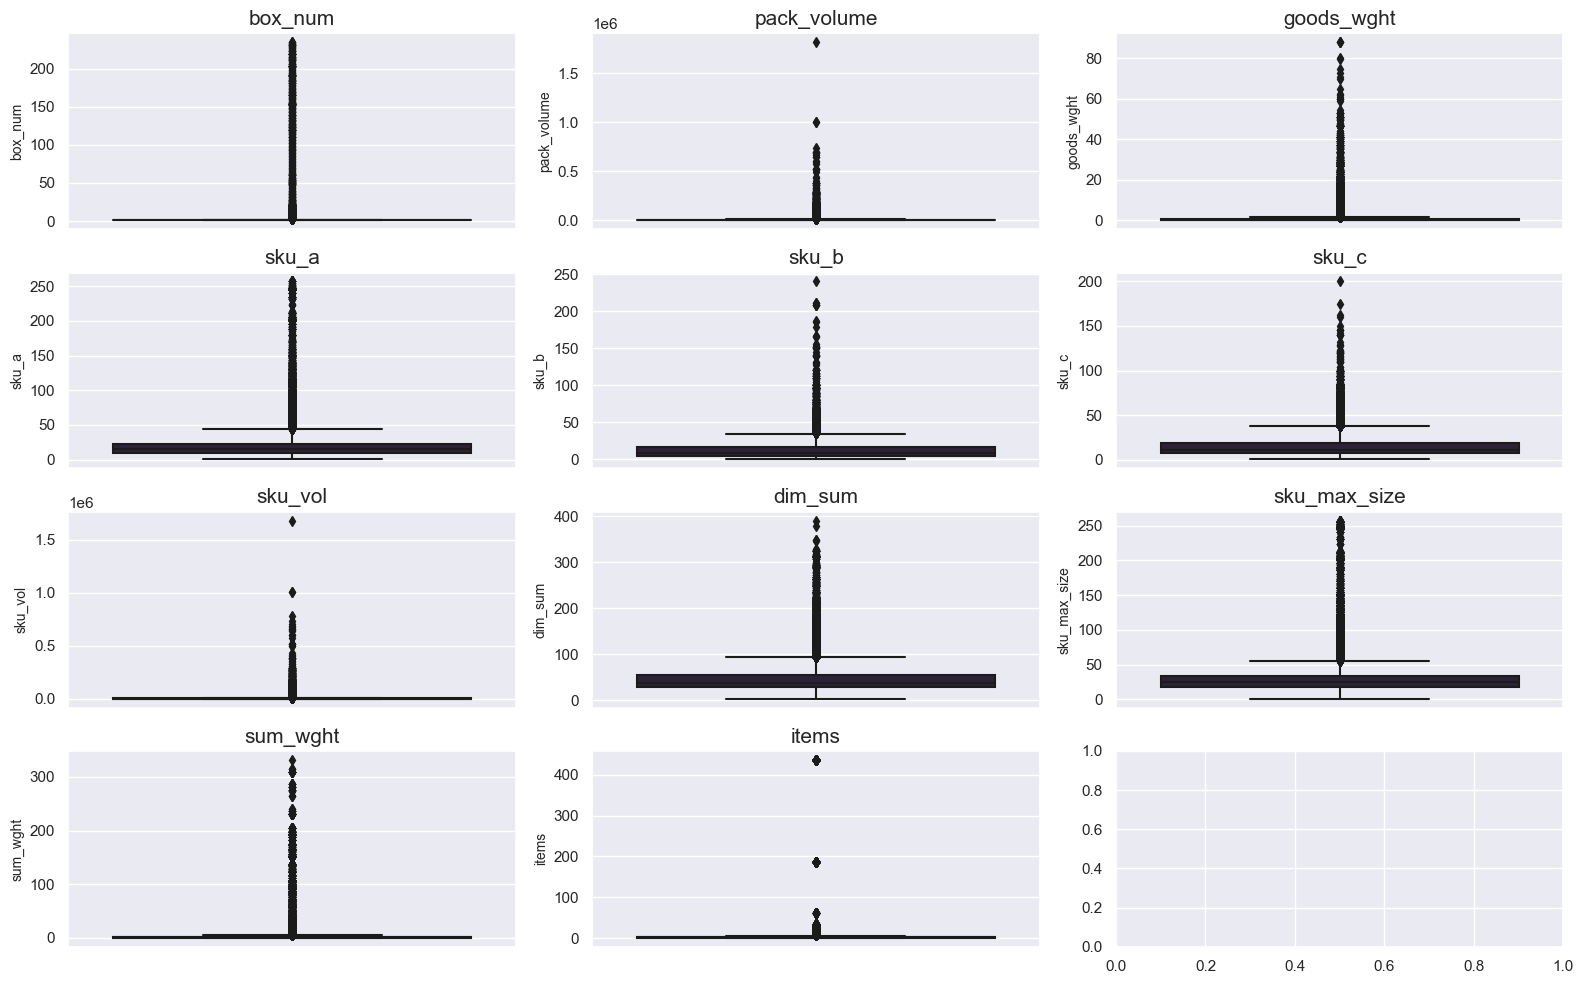

In [37]:
fig, axs = plt.subplots(4, 3, figsize=(16, 10))

axs = axs.ravel()

for i in range(11):
    sns.boxplot(y=df_numeric[df_numeric.columns[i]], ax=axs[i])  
    axs[i].set_title(df_numeric.columns[i])

plt.tight_layout()
plt.show()

# Закодируем КАРГОТИПЫ

In [38]:
mlb = MultiLabelBinarizer()

one_hot = mlb.fit_transform(sku_groups['cargotype'])

one_hot_df = pd.DataFrame(one_hot, columns=mlb.classes_)

one_hot_df['sku'] = sku_groups['sku']

In [39]:
df = pd.merge(df, one_hot_df, on='sku', how='left')

In [40]:
df.describe()

cols_zero_max = df.describe().columns[df.describe().loc['max'] == 0]

cols_zero_max

Index([10, 80, 299, 333, 752, 760, 907, 985], dtype='object')

Дропнем колонки, где только нулевые значения

In [41]:
df = df.drop(cols_zero_max, axis=1)

In [42]:
numeric_columns = df.loc[:,df.dtypes!=np.object_].columns

In [43]:
### Секретные функции для фильтрации признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
pack_volume  sku_vol         0.986157
300          301             0.984649
620          623             0.951825
600          970             0.858244
440          441             0.854983
box_num      items           0.849502
sku_a        dim_sum         0.849044
290          291             0.813464
120          1010            0.784581
dim_sum      sku_max_size    0.768779
dtype: float64


Есть сильная корреляция некоторых признаков

Надо будет потом посмотреть что с ними делать

In [44]:
df = df.dropna().reset_index(drop=True)

In [45]:
df

,box_num,selected_carton,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sum_wght,items,0,20,40,81,110,120,130,140,160,200,210,290,291,292,300,301,302,303,305,310,315,320,330,340,350,360,400,410,440,441,460,480,485,490,510,520,600,601,610,611,620,621,622,623,640,641,670,671,672,673,690,691,692,710,720,750,751,770,780,790,799,801,900,901,905,908,910,911,920,930,931,950,955,960,970,980,990,1010,1011,1300
0,1,NONPACK,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,31.0,0.300,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,STRETCH,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,49.7,0.896,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,STRETCH,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,30.0,4.400,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,STRETCH,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,43.8,0.700,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,STRETCH,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,33.9,2.078,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179084,6,NONPACK,1832,0.878,74ec431f87644bfed9baca351fffcdee,231.0,1.0,8.0,1848.0,240.0,231.0,62.868,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179085,2,NONPACK,28348,1.598,ca652ac8bf220d6ea04635208136b520,38.5,11.8,62.4,28348.0,112.7,62.4,3.196,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
179086,2,NONPACK,2380,0.760,d0cdcfb1609293be2b891ec3e5d56d6a,70.0,1.0,34.0,2380.0,105.0,70.0,1.520,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [46]:
df_one = df.query('items == 1')

In [47]:
df_one.shape

(73052, 93)

In [86]:
df_one = df_one.query('selected_carton != "NONPACK" & selected_carton != "STRETCH"')

In [ ]:
df_one = df_one

In [87]:
df_more = df.query('items > 1')
df_more = df_more.query('selected_carton != "NONPACK" & selected_carton != "STRETCH"')

In [88]:
df_more.shape

(95755, 93)

In [150]:
df

,box_num,selected_carton,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sum_wght,items,0,20,40,81,110,120,130,140,160,200,210,290,291,292,300,301,302,303,305,310,315,320,330,340,350,360,400,410,440,441,460,480,485,490,510,520,600,601,610,611,620,621,622,623,640,641,670,671,672,673,690,691,692,710,720,750,751,770,780,790,799,801,900,901,905,908,910,911,920,930,931,950,955,960,970,980,990,1010,1011,1300
0,1,NONPACK,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,31.0,0.300,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,STRETCH,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,49.7,0.896,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,STRETCH,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,30.0,4.400,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,STRETCH,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,43.8,0.700,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,STRETCH,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,33.9,2.078,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179084,6,NONPACK,1832,0.878,74ec431f87644bfed9baca351fffcdee,231.0,1.0,8.0,1848.0,240.0,231.0,62.868,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179085,2,NONPACK,28348,1.598,ca652ac8bf220d6ea04635208136b520,38.5,11.8,62.4,28348.0,112.7,62.4,3.196,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
179086,2,NONPACK,2380,0.760,d0cdcfb1609293be2b891ec3e5d56d6a,70.0,1.0,34.0,2380.0,105.0,70.0,1.520,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [164]:
df.query('items == 436')

,box_num,selected_carton,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sum_wght,items,0,20,40,81,110,120,130,140,160,200,210,290,291,292,300,301,302,303,305,310,315,320,330,340,350,360,400,410,440,441,460,480,485,490,510,520,600,601,610,611,620,621,622,623,640,641,670,671,672,673,690,691,692,710,720,750,751,770,780,790,799,801,900,901,905,908,910,911,920,930,931,950,955,960,970,980,990,1010,1011,1300
25962,60,NONPACK,8562,0.556,06db92181cfd466e53991c941f007ea3,16.5,14.7,35.3,8562.0,66.5,63.0,106.603,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26767,1,NONPACK,12874,0.176,19a96a1e5844da5057310e36a4bdc424,24.6,19.9,26.3,12874.0,70.8,63.0,106.603,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26768,1,NONPACK,576,0.145,666fceabc01528bcfb291865bd4abdf4,12.0,6.0,8.0,576.0,26.0,63.0,106.603,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26769,11,NONPACK,576,0.145,666fceabc01528bcfb291865bd4abdf4,12.0,6.0,8.0,576.0,26.0,63.0,106.603,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26770,12,NONPACK,576,0.145,666fceabc01528bcfb291865bd4abdf4,12.0,6.0,8.0,576.0,26.0,63.0,106.603,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81980,180,NONPACK,4445,0.276,2729db614e74ed3e92929d21c8a0c7da,22.9,9.2,21.1,4445.0,53.2,63.0,106.603,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
87502,156,NONPACK,1924,0.648,7fde3cf58fe1c913084b6525d430fdbb,7.7,29.4,8.5,1924.0,45.6,63.0,106.603,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88221,208,NONPACK,8188,0.232,17c7ca7886a4566b770043afb96932b0,28.4,6.8,42.4,8188.0,77.6,63.0,106.603,436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [163]:
df['items'].value_counts()

1      73052
2      40180
3      22276
4      13124
5       8434
6       5764
7       3520
8       2586
9       2116
10      1606
12      1079
11      1074
13       598
436      436
14       410
15       388
16       382
17       357
19       317
18       269
21       231
187      187
22       175
25        75
23        69
61        61
20        60
26        52
36        36
33        33
32        32
31        31
28        28
27        27
24        24
Name: items, dtype: int64

In [161]:
df['selected_carton'].value_counts(normalize=True)

MYB        0.185969
MYC        0.167051
MYD        0.086934
YMC        0.082177
NONPACK    0.074427
MYA        0.069189
YMG        0.060556
YMF        0.057223
YMW        0.054347
YMA        0.046804
STRETCH    0.040159
MYE        0.034865
YME        0.029103
MYF        0.004746
YML        0.004523
YMX        0.001926
Name: selected_carton, dtype: float64

In [165]:
carton_val = pd.DataFrame(df['selected_carton'].value_counts()).reset_index()

carton_val.columns = ['cartontype', 'values']

carton_val = pd.merge(carton_val, carton[['cartontype', 'length', 'width', 'height', 'vol']])

carton_val

,cartontype,values,length,width,height,vol
0,MYB,33305,22.0,32.0,4.90,3449.6
1,MYC,29917,30.0,38.0,7.40,8436.0
2,MYD,15569,38.0,50.0,8.20,15580.0
3,YMC,14717,30.0,20.0,15.00,9000.0
4,NONPACK,13329,0.0,0.0,0.00,0.0
5,MYA,12391,15.0,20.0,3.33,999.0
6,YMG,10845,44.7,30.0,20.00,26820.0
7,YMF,10248,35.0,25.0,15.00,13125.0
8,YMW,9733,40.0,30.0,15.00,18000.0
9,YMA,8382,24.7,15.0,10.00,3705.0


In [153]:
y_train_more.value_counts()

MYC    11313
YMC     9174
MYB     8828
YMG     7573
YMF     6917
MYD     6745
YMW     6646
YMA     4181
YME     3712
MYE     3016
MYA     2677
YML      572
MYF      232
YMX      230
Name: selected_carton, dtype: int64

In [158]:
carton.columns

Index(['cartontype', 'length', 'width', 'height', 'displayrfpack', 'vol',
       'dim_sum'],
      dtype='object')

# Модель

In [149]:
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import f1_score, accuracy_score

In [91]:
def data_split(data: pd.DataFrame(), cols_to_drop: list, target: str):
    X = data.drop(cols_to_drop, axis=1)
    X = X.drop('pack_volume', axis=1)
    X = X.select_dtypes(include=['float64', 'int64'])
    X.columns = X.columns.astype(str)
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=RANDOM,
                                                    stratify=y,
                                                    shuffle=True)
    
    return X_train, X_test, y_train, y_test


In [92]:
X_train_one, X_test_one, y_train_one, y_test_one = data_split(df_one, df.columns[13:], 'selected_carton')
X_train_more, X_test_more, y_train_more, y_test_more = data_split(df_more, list(df.columns[13:]), 'selected_carton')

In [54]:
X_train_one

,box_num,goods_wght,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sum_wght,items
36455,1,0.409,40.0,7.0,7.0,1960.0,54.0,40.0,0.409,1
96192,1,0.575,22.0,12.0,17.0,4488.0,51.0,22.0,0.575,1
70096,1,0.520,9.0,5.0,22.0,990.0,36.0,22.0,0.520,1
4291,1,1.600,100.0,8.0,10.0,8000.0,118.0,100.0,1.600,1
159687,1,0.210,12.0,17.0,8.0,1632.0,37.0,17.0,0.210,1
...,...,...,...,...,...,...,...,...,...,...
35414,1,0.800,16.0,9.0,28.0,4032.0,53.0,28.0,0.800,1
53884,1,1.130,46.0,14.0,31.0,19964.0,91.0,46.0,1.130,1
120300,1,0.350,15.0,20.0,6.0,1800.0,41.0,20.0,0.350,1
5984,1,1.960,63.0,14.0,15.0,13230.0,92.0,63.0,1.960,1


In [121]:
def sgd_pipe(X_train, X_test, y_train, y_test, smote=False):
    if smote:
        sm = SMOTE(random_state=RANDOM)
        X_train, y_train = sm.fit_resample(X_train, y_train)
    pipe = Pipeline([('scaler', StandardScaler()), ("SGD", SGDClassifier())])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    print(f'TRAIN ACC: {accuracy_score(y_train, pipe.predict(X_train))}')
    print(f'TEST ACC: {accuracy_score(y_test, preds)}')
    print(f'TEST F1: {f1_score(y_test, preds, average="weighted")}')

    print(classification_report(y_test, preds))

In [122]:
sgd_pipe(X_train_one, X_test_one, y_train_one, y_test_one)

TRAIN ACC: 0.39151754441826403
TEST ACC: 0.3933392766174223
TEST F1: 0.2998158884247108
              precision    recall  f1-score   support

         MYA       0.05      0.00      0.00      2206
         MYB       0.44      0.87      0.58      5384
         MYC       0.33      0.34      0.34      3708
         MYD       0.28      0.11      0.16      1644
         MYE       0.19      0.06      0.09       556
         MYF       0.00      0.00      0.00       135
         YMA       0.00      0.00      0.00       702
         YMC       0.04      0.00      0.00       621
         YME       0.03      0.03      0.03        65
         YMF       0.00      0.00      0.00       256
         YMG       0.06      0.02      0.03       187
         YML       0.00      0.00      0.00        12
         YMW       0.00      0.00      0.00       218
         YMX       0.00      0.00      0.00        10

    accuracy                           0.39     15704
   macro avg       0.10      0.10      0.09   

In [123]:
sgd_pipe(X_train_more, X_test_more, y_train_more, y_test_more)

TRAIN ACC: 0.19683635958560766
TEST ACC: 0.19478674965537407
TEST F1: 0.159122864236125
              precision    recall  f1-score   support

         MYA       0.00      0.00      0.00       892
         MYB       0.30      0.58      0.40      2943
         MYC       0.21      0.18      0.20      3771
         MYD       0.15      0.03      0.05      2248
         MYE       0.03      0.06      0.04      1005
         MYF       0.00      0.00      0.00        77
         YMA       0.16      0.10      0.12      1394
         YMC       0.21      0.22      0.22      3058
         YME       0.18      0.62      0.28      1238
         YMF       0.16      0.20      0.17      2306
         YMG       0.05      0.02      0.03      2524
         YML       0.00      0.00      0.00       191
         YMW       0.17      0.02      0.03      2216
         YMX       0.00      0.00      0.00        76

    accuracy                           0.19     23939
   macro avg       0.12      0.15      0.11   

TREE

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
def tree_pipe(X_train, X_test, y_train, y_test, smote=False):
    if smote:
        sm = SMOTE(random_state=RANDOM)
        X_train, y_train = sm.fit_resample(X_train, y_train)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier(class_weight='balanced', max_depth=5))
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    print(f'TRAIN ACC: {accuracy_score(y_train, pipe.predict(X_train))}')
    print(f'TEST ACC: {accuracy_score(y_test, preds)}')
    print(f'TEST F1: {f1_score(y_test, preds, average="weighted")}')

    print(classification_report(y_test, preds))
    return pipe

In [119]:
tree = tree_pipe(X_train_more, X_test_more, y_train_more, y_test_more)

TRAIN ACC: 0.19934276484348892
TEST ACC: 0.19691716445966834
TEST F1: 0.19098629474044498
              precision    recall  f1-score   support

         MYA       0.30      0.22      0.25       892
         MYB       0.41      0.17      0.24      2943
         MYC       0.32      0.24      0.28      3771
         MYD       0.27      0.15      0.19      2248
         MYE       0.13      0.30      0.18      1005
         MYF       0.02      0.38      0.04        77
         YMA       0.19      0.31      0.24      1394
         YMC       0.25      0.43      0.32      3058
         YME       0.31      0.20      0.24      1238
         YMF       0.00      0.00      0.00      2306
         YMG       0.00      0.00      0.00      2524
         YML       0.08      0.48      0.14       191
         YMW       0.18      0.13      0.15      2216
         YMX       0.01      0.62      0.03        76

    accuracy                           0.20     23939
   macro avg       0.18      0.26      0.16 

In [112]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(
        #learning_rate=0.01, 
        leaf_estimation_method='Gradient',
        #n_estimators=1000,
        subsample=0.1,
        #max_depth=4,
        verbose=100,
        #l2_leaf_reg = 7,
        bootstrap_type="Bernoulli",
        #class_weights='Balanced',#[1, 1, 1],
        loss_function='MultiClass',
        eval_metric='TotalF1')


cb.fit(X_train_one, y_train_one)

0:	learn: 0.3377620	total: 203ms	remaining: 3m 22s
100:	learn: 0.4012401	total: 10.1s	remaining: 1m 29s
200:	learn: 0.4138093	total: 18.8s	remaining: 1m 14s
300:	learn: 0.4186195	total: 26.6s	remaining: 1m 1s
400:	learn: 0.4225708	total: 34.5s	remaining: 51.5s
500:	learn: 0.4263119	total: 43.2s	remaining: 43s
600:	learn: 0.4308131	total: 52.1s	remaining: 34.6s
700:	learn: 0.4336336	total: 1m 1s	remaining: 26.4s
800:	learn: 0.4363462	total: 1m 11s	remaining: 17.7s
900:	learn: 0.4390284	total: 1m 20s	remaining: 8.8s
999:	learn: 0.4419154	total: 1m 28s	remaining: 0us


In [113]:
f_imp = pd.DataFrame(X_train_one.columns, index=cb.feature_importances_, columns=['features'])

f_imp.sort_index(ascending=False)

,features
18.730785,dim_sum
15.555094,sku_vol
14.681692,sku_max_size
13.028856,sum_wght
10.239675,goods_wght
9.864538,sku_a
8.839361,sku_b
8.724537,sku_c
0.335462,box_num
0.000000,items


In [124]:
p_pr = cb.predict_proba(X_test_one)

In [143]:
cb.classes_

array(['MYA', 'MYB', 'MYC', 'MYD', 'MYE', 'MYF', 'YMA', 'YMC', 'YME',
       'YMF', 'YMG', 'YML', 'YMW', 'YMX'], dtype=object)

In [147]:
carton.sort_values('vol')

,cartontype,length,width,height,displayrfpack,vol,dim_sum
7,KSD,0.0,0.0,0.00,0,0.000,0.00
16,STRETCH,0.0,0.0,0.00,1,0.000,0.00
15,NONPACK,0.0,0.0,0.00,1,0.000,0.00
24,MYA,15.0,20.0,3.33,1,999.000,38.33
21,MYF,20.0,15.0,5.00,1,1500.000,40.00
17,YMU,27.0,24.0,4.00,1,2592.000,55.00
25,MYB,22.0,32.0,4.90,1,3449.600,58.90
0,YMA,24.7,15.0,10.00,1,3705.000,49.70
18,YMV,37.0,29.0,4.00,1,4292.000,70.00
26,MYC,30.0,38.0,7.40,1,8436.000,75.40


In [148]:
y_test_one.value_counts()

MYB    5384
MYC    3708
MYA    2206
MYD    1644
YMA     702
YMC     621
MYE     556
YMF     256
YMW     218
YMG     187
MYF     135
YME      65
YML      12
YMX      10
Name: selected_carton, dtype: int64

In [144]:
p_pr

array([[0.10031608, 0.56506077, 0.21404935, ..., 0.00228716, 0.00542394,
        0.00225395],
       [0.04057442, 0.42311957, 0.43017741, ..., 0.00199038, 0.00457767,
        0.00194623],
       [0.28790363, 0.49484495, 0.0817694 , ..., 0.00206411, 0.003384  ,
        0.00204967],
       ...,
       [0.4978156 , 0.38853609, 0.05594817, ..., 0.00143732, 0.00187951,
        0.00142822],
       [0.33933185, 0.47437265, 0.10448758, ..., 0.00185559, 0.00285086,
        0.00183976],
       [0.03578477, 0.45183574, 0.38628517, ..., 0.00221092, 0.00558204,
        0.00211575]])

In [141]:
y_test_one

96275     MYB
62148     MYB
30052     MYA
50521     MYA
108022    MYC
         ... 
121487    MYB
49354     MYA
27265     MYB
89865     MYB
36533     MYC
Name: selected_carton, Length: 15704, dtype: object

In [115]:
pr = cb.predict(X_test_one)

print(classification_report(y_test_one, pr))
print(f'F1: {f1_score(y_test_one, pr, average="weighted")}')

              precision    recall  f1-score   support

         MYA       0.47      0.34      0.40      2206
         MYB       0.50      0.70      0.58      5384
         MYC       0.42      0.44      0.43      3708
         MYD       0.37      0.50      0.42      1644
         MYE       0.33      0.20      0.25       556
         MYF       0.00      0.00      0.00       135
         YMA       0.38      0.01      0.02       702
         YMC       0.00      0.00      0.00       621
         YME       0.00      0.00      0.00        65
         YMF       0.57      0.02      0.03       256
         YMG       0.11      0.01      0.01       187
         YML       0.00      0.00      0.00        12
         YMW       0.00      0.00      0.00       218
         YMX       0.00      0.00      0.00        10

    accuracy                           0.45     15704
   macro avg       0.22      0.16      0.15     15704
weighted avg       0.41      0.45      0.41     15704

F1: 0.41120391745970064


In [75]:
np.round(tree['tree'].feature_importances_, 3)

array([0.022, 0.008, 0.   , 0.   , 0.   , 0.129, 0.018, 0.335, 0.348,
       0.141])

In [73]:
tree_pipe(X_train_one, X_test_one, y_train_one, y_test_one)

TRAIN ACC: 0.26308200551205535
TEST ACC: 0.26014345945353995
TEST F1: 0.289682710545263
              precision    recall  f1-score   support

         MYA       0.40      0.57      0.47      2206
         MYB       0.55      0.26      0.35      5383
         MYC       0.49      0.13      0.20      3708
         MYD       0.32      0.33      0.32      1644
         MYE       0.00      0.00      0.00       556
         MYF       0.02      0.29      0.04       135
     NONPACK       0.65      0.38      0.48      1507
     STRETCH       0.32      0.09      0.14      1052
         YMA       0.11      0.35      0.16       702
         YMC       0.09      0.06      0.08       621
         YME       0.01      0.23      0.02        66
         YMF       0.05      0.25      0.09       256
         YMG       0.12      0.06      0.08       187
         YML       0.00      0.25      0.01        12
         YMW       0.00      0.00      0.00       218
         YMX       0.00      0.30      0.01    

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5))])

In [417]:
X_train_drop = X_train[['sum_wght', 'dim_sum', 'items', 'sku_max_size']]
X_test_drop = X_test[['sum_wght', 'dim_sum', 'items', 'sku_max_size']]

tree_pipe.fit(X_train_drop, y_train)

drop_preds = tree_pipe.predict(X_test_drop)

In [418]:
print(f'TRAIN ACC: {accuracy_score(y_train, tree_pipe.predict(X_train_drop))}')
print(f'TEST ACC: {accuracy_score(y_test, drop_preds)}')

TRAIN ACC: 0.25280681378242353
TEST ACC: 0.25111116074419854


In [434]:
param_grid = {
    'Ada__n_estimators': np.arange(10, 100, 10),
    'Ada__learning_rate': [0.01, 0.05, 0.1, 1]
}

In [437]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

ada_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('Ada', AdaBoostClassifier())
])

search = GridSearchCV(ada_pipe, param_grid=param_grid, scoring='f1_weighted', cv=5, verbose=1)

In [438]:
search.fit(X_train_drop, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('Ada', AdaBoostClassifier())]),
             param_grid={'Ada__learning_rate': [0.01, 0.05, 0.1, 1],
                         'Ada__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='f1_weighted', verbose=1)

In [439]:
search.best_params_

{'Ada__learning_rate': 0.1, 'Ada__n_estimators': 90}

In [440]:
search.best_score_

0.2779916964306385

In [441]:
ada_pipe.set_params(**search.best_params_)

ada_pipe.fit(X_train_drop, y_train)

ada_preds = ada_pipe.predict(X_test_drop)

In [442]:
print(f1_score(y_test, ada_preds, average='weighted'))

0.27798531989563646


In [443]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

         MYA       0.00      0.00      0.00      3098
         MYB       0.46      0.66      0.54      8327
         MYC       0.30      0.56      0.39      7479
         MYD       0.22      0.24      0.23      3892
         MYE       0.00      0.00      0.00      1561
         MYF       0.00      0.00      0.00       213
     NONPACK       0.49      0.67      0.57      3332
     STRETCH       0.00      0.00      0.00      1798
         YMA       0.00      0.00      0.00      2096
         YMC       0.25      0.25      0.25      3679
         YME       0.04      0.00      0.00      1303
         YMF       0.22      0.06      0.10      2562
         YMG       0.26      0.52      0.34      2711
         YML       0.00      0.00      0.00       203
         YMW       0.16      0.02      0.04      2433
         YMX       0.00      0.00      0.00        86

    accuracy                           0.34     44773
   macro avg       0.15   

# Объединение в группы WIP

In [64]:
cargotype_info.sort_values('cargotype')

,cargotype,description
40,0.0,не определен
7,10.0,документы и ценные бумаги
44,20.0,возрастное ограничение на получение товара
16,40.0,ценное
8,50.0,предметы искусства
36,80.0,драгоценности
71,81.0,"аксессуары, часы и украшения"
9,100.0,товары народного потребления
53,110.0,в ассортименте
49,120.0,корма для животных


In [97]:
def cat_carton_div(data: pd.DataFrame, start: int, end: int):
    num_type = list(data[(data['cargotype']>=start)&(data['cargotype']<end)]['cargotype'].values)
    text_type = list(data[(data['cargotype']>=start)&(data['cargotype']<end)]['description'].values)

    return [num_type, text_type]

In [116]:
cat_carton_test = {1:cat_carton_div(cargotype_info, 0, 100),
                2: cat_carton_div(cargotype_info, 100, 290),
                3: cat_carton_div(cargotype_info, 290, 300),
                4: cat_carton_div(cargotype_info, 300, 310),
                5: cat_carton_div(cargotype_info, 310, 340),
                6: cat_carton_div(cargotype_info, 300, 310)}

In [117]:
cat_carton_test

{1: [[10.0, 50.0, 40.0, 80.0, 0.0, 20.0, 81.0],
  ['документы и ценные бумаги',
   'предметы искусства',
   'ценное',
   'драгоценности',
   'не определен',
   'возрастное ограничение на получение товара',
   'аксессуары, часы и украшения']],
 2: [[100.0,
   200.0,
   220.0,
   230.0,
   150.0,
   140.0,
   160.0,
   130.0,
   120.0,
   110.0,
   210.0],
  ['товары народного потребления',
   'техника и электроника',
   'литий-ионные батареи',
   'техника и электроника с литий-ионными батареями',
   'малогабаритный товар',
   'пестициды',
   'строительные материалы',
   'агрохимикаты',
   'корма для животных',
   'в ассортименте',
   'цифровой товар']],
 3: [[291.0, 290.0, 292.0],
  ['Склад СГТ (среднегабаритный товар)',
   'Склад МГТ (малогабаритный товар)',
   'Склад КГТ (крупногабаритный товар)']],
 4: [[301.0, 300.0, 305.0, 302.0, 303.0],
  ['тяжеловесный и крупногабаритный 20кг',
   'тяжеловесный и крупногабаритный',
   'мебель',
   'тяжеловесный и крупногабаритный больше паллеты',